In [10]:
import requests as req
from bs4 import BeautifulSoup as bs

In [11]:
# https://finance.naver.com/marketindex/?tabSel=exchange#tab_section

In [ ]:
# https://finance.naver.com/marketindex/exchangeList.naver

In [12]:
# 1.req로 페이지 정보 요청
# 반드시 상대경로 --> 절대 경로로 변경된 주소를 다시 req 해야한다
# /marketindex/exchangeList.naver
# https://finance.naver.com/marketindex/?tabSel=exchange#tab_section
# https://finance.naver.com/marketindex/exchangeList.naver

res=req.get('https://finance.naver.com/marketindex/exchangeList.naver')
res.text

'<html lang=\'ko\'>\n<head>\n<title>네이버페이 증권</title>\n<meta http-equiv=\'Content-Type\' content=\'text/html; charset=euc-kr\'>\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240131102436/css/finance.css">\n\n<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20240131102436/js/info/jindo.min.ns.1.5.3.euckr.js"></script>\n<script type="text/javascript" src="https://ssl.pstatic.net/imgstock/static.pc/20240131102436/js/lcslog.js"></script>\n</head>\n<body>\n<div class="tbl_area">\n\t<table border="1" class="tbl_exchange" summary="환전 고시 환율 리스트">\n\t<caption>환전 고시 환율</caption>\n\t<colgroup>\n\t\t<col width="162">\n\t\t<col width="92">\n\t\t<col width="92">\n\t\t<col width="92">\n\t\t<col width="93">\n\t\t<col width="92">\n\t\t<col width="90">\n\t</colgroup>\n\t<thead>\n\t<tr>\n\t<th rowspan="2" \n

In [13]:
#  2. bs을 통해서 soup 데이터로 변형
soup = bs(res.text,"lxml")
soup

<html lang="ko">
<head>
<title>네이버페이 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20240131102436/css/finance.css" rel="stylesheet" type="text/css"/>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20240131102436/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript"></script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20240131102436/js/lcslog.js" type="text/javascript"></script>
</head>
<body>
<div class="tbl_area">
<table border="1" class="tbl_exchange" summary="환전 고시 환율 리스트">
<caption>환전 고시 환율</caption>
<colgroup>
<col width="162"/>
<col width="92"/>
<col width="92"/>
<col width="92"/>
<col width="93"/>
<col width="92"/>
<col width="90"/>
</colgroup>
<thead>
<tr>
<th class="th_ex1" rowspan="2">
<a href="#" onclick="javascript:changeOrder('exchang

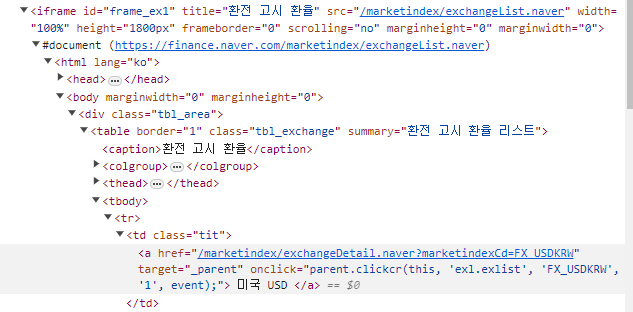

In [16]:
# 3.selector을 이용하여 통화명을 수집
# ->copy기능 활용
# 단수개의 선택자 삭제 -->tr
# 선택자도 맞고 [200]통신도 맞다
# 근데 수집 안된다
# [200]통신이 성공하면 실제 
title = soup.select("body > div > table > tbody > tr > td.tit > a")
print(len(title))
title

58


[<a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_USDKRW', '1', event);" target="_parent">
 				
 					
 					
 					
 					미국 USD
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_EURKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_EURKRW', '2', event);" target="_parent">
 				
 					
 					
 					
 					유럽연합 EUR
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_JPYKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_JPYKRW', '3', event);" target="_parent">
 				
 					일본 JPY (100엔)
 					
 					
 					
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_CNYKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_CNYKRW', '4', event);" target="_parent">
 				
 					
 					
 					
 					중국 CNY
 				
 				</a>,
 <a href="/marketindex/exchangeDetail.naver?marketindexCd=FX_HKDKRW" onclick="parent.clickcr(this, 'exl.exlist', 'FX_HKDKRW', '5', 

# iframe태그
- 다른 서버에 있는 html파일을 창을 통해서 보여주는 역할을 태그
- 접근을 하기 위해서는 원본 주소로 찾아가야 한다
- 크롤링 할시 수집이 안된는 경우 3가지 의심
1) 응답코드가 200이 아닌경우
2) 선택자의 오류
3) iframe을 검사
- 검사하는 방법 : iframe의 src부분 값을 확인
- 1) 절대경로 --> http:// url
- 2) 상대경로 --> /폴더/폴더/파일
- 3) 상대경로인 경우에는 절대 경로로 변경 -> 실제 사이트의 url을 수정
- 4) iframe태그를 보면 그 안에 head와 body가 또 있다 즉 원래 head와 body는 하나여야 하는데 iframe태그가 있다는 것은 원본페이지를 창에 그대로 보여준다는 의미가 되므로 원본의 head와 body가 보이는 것이다.
- 5) 원래 적은 url은 원본 url을 창에 보여주는 기능의 페이지이다 --> 고로 올바른 선택자를 써도 원본 url를 요청(req)을 한게 아니므로 자료수집이 안된다 
- 6) 원래 적은url의 선택자 태그 와  원본 url 선택자 태그는 값이 동일하다


In [ ]:
#iframe 태그 사용 --> 같은 페이지안에 다른 페이지를 보여주고자 할때
#유튜브영상을 내가 만든 페이지에 넣고자 할 때--> vs코드에  바디에 iframe 태그를 넣는다
#영상 우클릭 해서 코드를 복사후에 바디 태그에 iframe 태그를 넣고 복사한 코드를 넣는다 
#환율정보를 보여줄 때
#단 보여지기만 하지 수정은 안됨
#개발자 도구를 보면 html태그 안에 원본 html태그가 보인다 --> head body태그가 또 보인다

In [20]:
# 데이터 정제 - 텍스트만 수집
title_list=[]
for i in title:
    title_list.append(i.text)
title_list  

['\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t미국 USD\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t유럽연합 EUR\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t일본 JPY (100엔)\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t중국 CNY\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t홍콩 HKD\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t대만 TWD\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t영국 GBP\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t오만 OMR\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t캐나다 CAD\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t스위스 CHF\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t스웨덴 SEK\n\t\t\t\t\n\t\t\t\t',
 '\n\t\t\

In [21]:
# 개행과 같은 불필요한 내용를 지우는 작업 --> text.strip()
title_list=[]
for i in title:
    title_list.append(i.text.strip())
title_list  

['미국 USD',
 '유럽연합 EUR',
 '일본 JPY (100엔)',
 '중국 CNY',
 '홍콩 HKD',
 '대만 TWD',
 '영국 GBP',
 '오만 OMR',
 '캐나다 CAD',
 '스위스 CHF',
 '스웨덴 SEK',
 '호주 AUD',
 '뉴질랜드 NZD',
 '체코 CZK',
 '칠레 CLP',
 '튀르키예 TRY',
 '몽골 MNT',
 '이스라엘 ILS',
 '덴마크 DKK',
 '노르웨이 NOK',
 '사우디아라비아 SAR',
 '쿠웨이트 KWD',
 '바레인 BHD',
 '아랍에미리트 AED',
 '요르단 JOD',
 '이집트 EGP',
 '태국 THB',
 '싱가포르 SGD',
 '말레이시아 MYR',
 '인도네시아 IDR 100',
 '카타르 QAR',
 '카자흐스탄 KZT',
 '브루나이 BND',
 '인도 INR',
 '파키스탄 PKR',
 '방글라데시 BDT',
 '필리핀 PHP',
 '멕시코 MXN',
 '브라질 BRL',
 '베트남 VND 100',
 '남아프리카 공화국 ZAR',
 '러시아 RUB',
 '헝가리 HUF',
 '폴란드 PLN',
 '스리랑카 LKR',
 '알제리 DZD',
 '케냐 KES',
 '콜롬비아 COP',
 '탄자니아 TZS',
 '네팔 NPR',
 '루마니아 RON',
 '리비아 LYD',
 '마카오 MOP',
 '미얀마 MMK',
 '에티오피아 ETB',
 '우즈베키스탄 UZS',
 '캄보디아 KHR',
 '피지 FJD']